# Analyzing and preparing the new OekoFor Test Data

### Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np

The labels are .csv files and the audio files are .flac

### Variables

In [2]:
LABELS = "../../models/Oekofor-Testset/labels"
AUDIOS = "../../models/Oekofor-Testset/audio_files"

In [3]:
SPECIES = {}
CALL_TYPES_PER_SPECIES = {}
RECORDING_SITES = {}
SPECIES_PER_RECORDING_SITES = {}

### Create Dataframe from all files

In [4]:
# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the files in the LABELS directory
for file_name in os.listdir(LABELS):
    if file_name.endswith('.csv'):
        file_path = os.path.join(LABELS, file_name)
        temp_df = pd.read_csv(file_path)
        df = pd.concat([df, temp_df], ignore_index=True)

# Display the dataframe
df.head()

,audio_filename,start_time,end_time,low_freq,high_freq,lat,long,GPS_uncertainty_km,project_code,recorder,...,tsn_code,GBIF_ID,common_name,scientific_name,subspecies,microphone,source,recordist,validator,validation_time
0,SN057_2019_04_20_20_27_40_evening,0.06,2.25,1150.9,3025.2,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,179757.0,2490719.0,Eurasian Blackbird,Turdus merula,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
1,SN057_2019_04_20_20_27_40_evening,0.06,6.02,1479.4,9788.2,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,563604.0,7901064.0,Song Thrush,Turdus philomelos,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
2,SN057_2019_04_20_20_27_40_evening,4.01,4.30,2986.6,4377.8,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,562129.0,2493091.0,Common Chiffchaff,Phylloscopus collybita,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
3,SN057_2019_04_20_20_27_40_evening,7.11,7.41,2870.6,4184.6,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,562129.0,2493091.0,Common Chiffchaff,Phylloscopus collybita,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
4,SN057_2019_04_20_20_27_40_evening,5.78,6.07,2947.9,4223.2,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,562129.0,2493091.0,Common Chiffchaff,Phylloscopus collybita,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06


# Analysis

## File amount

In [ ]:
print(f"Number of unique files in the dataframe: {len(df['audio_filename'].unique())}")
print(f"Number of files in labels directory: {len(os.listdir(LABELS))}")
print(f"Number of rows in the dataframe: {len(df)}\n")
print(f"Removed {len(df[df['correct'] == 0])} rows with incorrect labels")
df = df[df['correct'] != 0]
print(f"Removed {len(df[df['common_name'] == 'Bird'])} rows with no exact Bird information")
df = df[df['common_name'] != 'Bird']
print(f"Number of rows after removing invalid entries: {len(df)}")

Number of unique files in the dataframe: 153
Number of files in labels directory: 153
Number of rows in the dataframe: 16020

Removed 118 rows with incorrect labels
Removed 848 rows with no exact Bird information
Number of rows after removing incorrect entries: 15054


## Metadata list

In [6]:
print("Columns in the dataframe:")
for column in df.columns:
    print(f"- {column}")

Columns in the dataframe:
- audio_filename
- start_time
- end_time
- low_freq
- high_freq
- lat
- long
- GPS_uncertainty_km
- project_code
- recorder
- pointofvocalization
- vocalization_type
- sex
- correct
- time_UTC
- ebird_code
- tsn_code
- GBIF_ID
- common_name
- scientific_name
- subspecies
- microphone
- source
- recordist
- validator
- validation_time


## Species amount

In [7]:
SPECIES = df['common_name'].value_counts().to_dict()

print("Common name counts:")
print(SPECIES)



unique_common_names = len(SPECIES.keys())
unique_ebird = df['ebird_code'].unique()

print(f"Number of unique common names: {unique_common_names}")
print(f"Number of ebird codes: {len(unique_ebird)}")

Common name counts:
{'Eurasian Blackbird': 2659, 'Common Chaffinch': 1906, 'European Robin': 1601, 'Song Thrush': 1594, 'Eurasian Blackcap': 1051, 'Common Chiffchaff': 907, 'Eurasian Blue Tit': 563, 'Great Tit': 504, 'Eurasian Wren': 462, 'Mistle Thrush': 405, 'Common Firecrest': 370, 'Coal Tit': 296, 'Goldcrest': 293, 'Eurasian Nuthatch': 229, 'Marsh Tit': 205, 'Yellowhammer': 197, 'Eurasian Bullfinch': 160, 'Red Crossbill': 151, 'Great Spotted Woodpecker': 146, 'Spotted Flycatcher': 142, 'Willow Warbler': 133, 'Crested Tit': 100, 'Dunnock': 97, 'Hawfinch': 80, 'Common Cuckoo': 79, 'Tree Pipit': 67, 'Eurasian Treecreeper': 62, 'Common Wood-Pigeon': 60, 'Short-toed Treecreeper': 59, 'Tawny Owl': 52, 'Brambling': 51, 'European Starling': 48, 'Eurasian Siskin': 43, 'Black Woodpecker': 38, 'Eurasian Jay': 30, 'Garden Warbler': 24, 'Common Raven': 24, 'Willow Tit': 21, 'Eurasian Green Woodpecker': 19, 'Redwing': 14, 'Carrion Crow': 13, 'European Roe Deer': 13, 'European Pied Flycatcher': 1

Visualisation

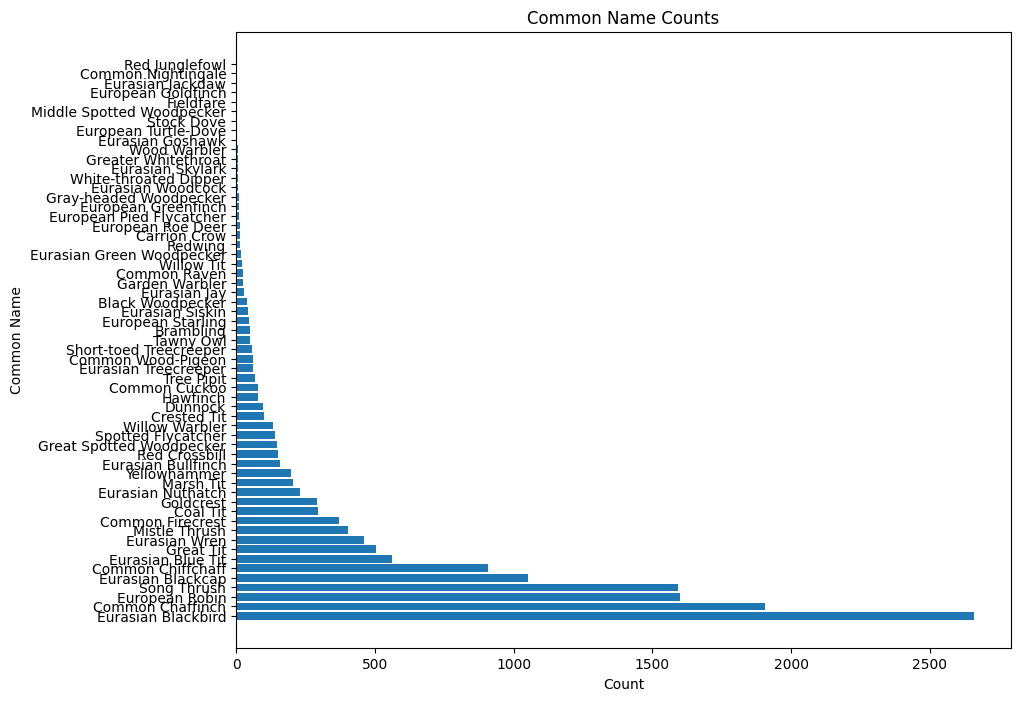

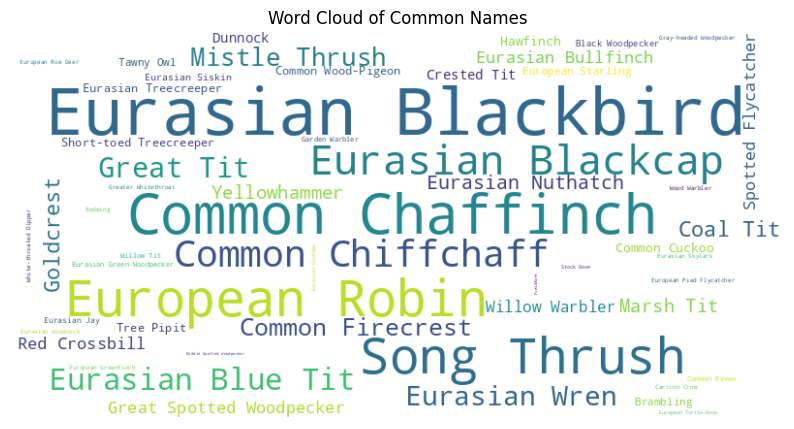

In [8]:
# Plot the common names and their counts
plt.figure(figsize=(10, 8))
plt.barh(list(SPECIES.keys()), list(SPECIES.values()))
plt.xlabel('Count')
plt.ylabel('Common Name')
plt.title('Common Name Counts')
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(SPECIES)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Names')
plt.show()

## Distribution of call types per species

In [9]:
# Group by common_name and vocalization_type, then count occurrences
print(df['vocalization_type'].value_counts())

CALL_TYPES_PER_SPECIES = df.groupby(['common_name', 'vocalization_type']).size().unstack(fill_value=0)

# Display the distribution
CALL_TYPES_PER_SPECIES.head()

vocalization_type
song                 11062
contact call          2855
alarm call             548
flight call            410
drumming                85
sub song                41
excitement call         41
call                     5
something                4
vocal                    1
ground alarm call        1
whistle                  1
Name: count, dtype: int64


vocalization_type,alarm call,call,contact call,drumming,excitement call,flight call,ground alarm call,something,song,sub song,vocal,whistle
common_name,,,,,,,,,,,,
Black Woodpecker,0,0,28,0,2,7,0,0,1,0,0,0
Brambling,0,0,14,0,0,5,0,0,32,0,0,0
Carrion Crow,0,0,13,0,0,0,0,0,0,0,0,0
Coal Tit,0,0,8,0,0,0,0,0,288,0,0,0
Common Chaffinch,1,0,628,0,0,46,0,0,1200,31,0,0


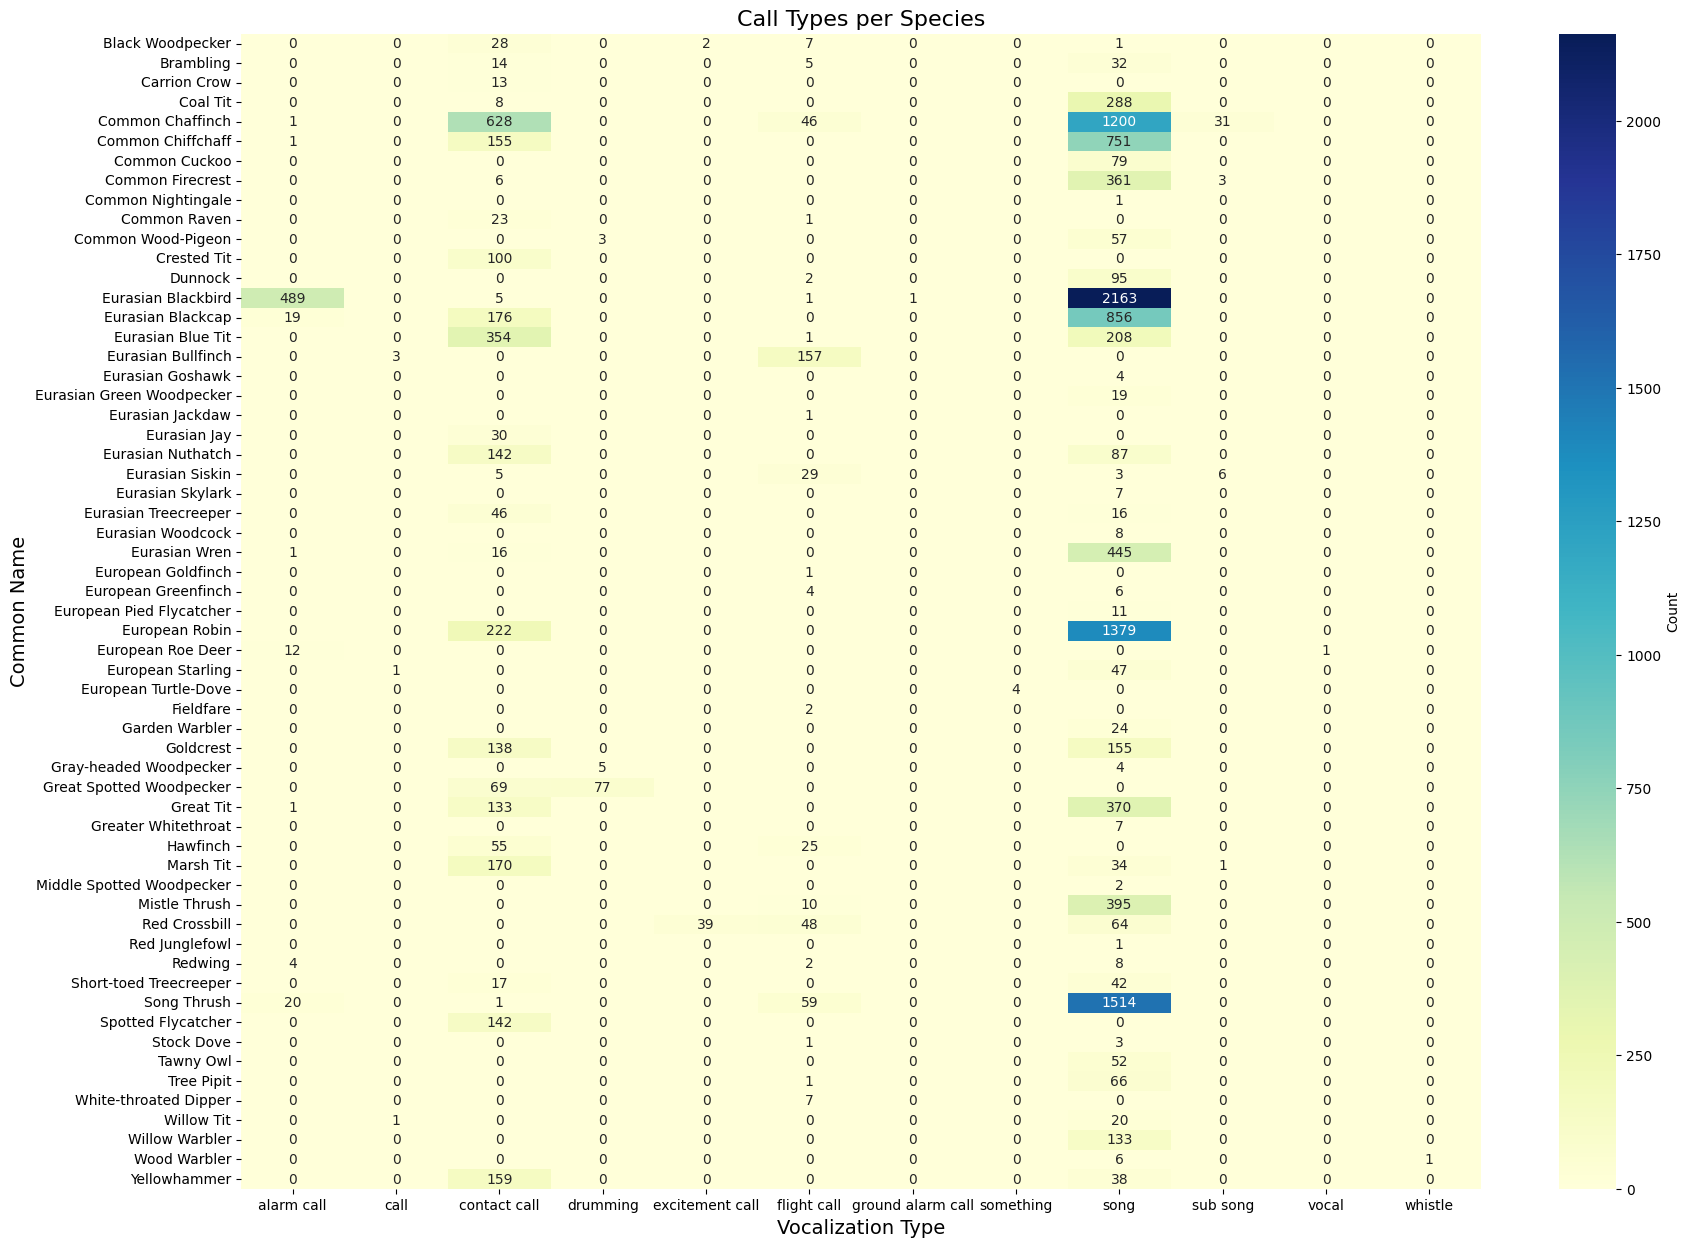

In [10]:
plt.figure(figsize=(20, 15))

# Create a heatmap
sns.heatmap(CALL_TYPES_PER_SPECIES, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Count'})

# Set the labels and title
plt.xlabel('Vocalization Type', fontsize=14)
plt.ylabel('Common Name', fontsize=14)
plt.title('Call Types per Species', fontsize=16)

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Display the plot
plt.show()

## Number of recording sites

I assumed that recorder refers to different recording devices and therefore recording sites

recorder
019SN057    623
019SN050    614
019SN075    503
019SN076    446
019SN009    445
           ... 
019SN019     32
019SN089     26
020SN012     15
020SN061      2
020SN019      2
Name: count, Length: 81, dtype: int64


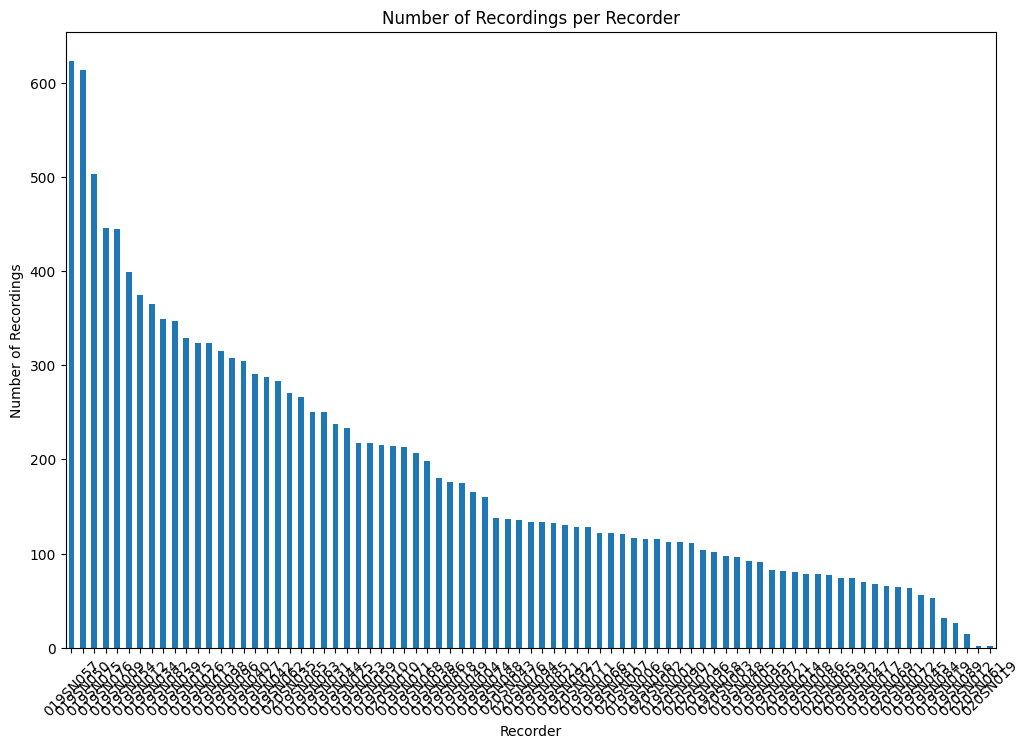

In [11]:
RECORDING_SITES = df['recorder'].value_counts()
print(RECORDING_SITES)

# Plot the number of recordings per recorder
plt.figure(figsize=(12, 8))
RECORDING_SITES.plot(kind='bar')
plt.xlabel('Recorder')
plt.ylabel('Number of Recordings')
plt.title('Number of Recordings per Recorder')
plt.xticks(rotation=45)
plt.show()

## Distribution of species to recording site

In [12]:
SPECIES_PER_RECORDING_SITES  = df.groupby(['common_name', 'recorder']).size().unstack(fill_value=0)

# Display the distribution
SPECIES_PER_RECORDING_SITES .head()

recorder,019SN001,019SN004,019SN005,019SN006,019SN008,019SN009,019SN010,019SN011,019SN012,019SN013,...,020SN039,020SN043,020SN061,020SN065,020SN071,020SN076,020SN077,020SN086,020SN090,020SN096
common_name,,,,,,,,,,,,,,,,,,,,,
Black Woodpecker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brambling,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carrion Crow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Coal Tit,12,17,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Common Chaffinch,45,8,50,4,0,5,0,3,51,27,...,3,45,0,0,20,20,8,0,26,0


Log scale!

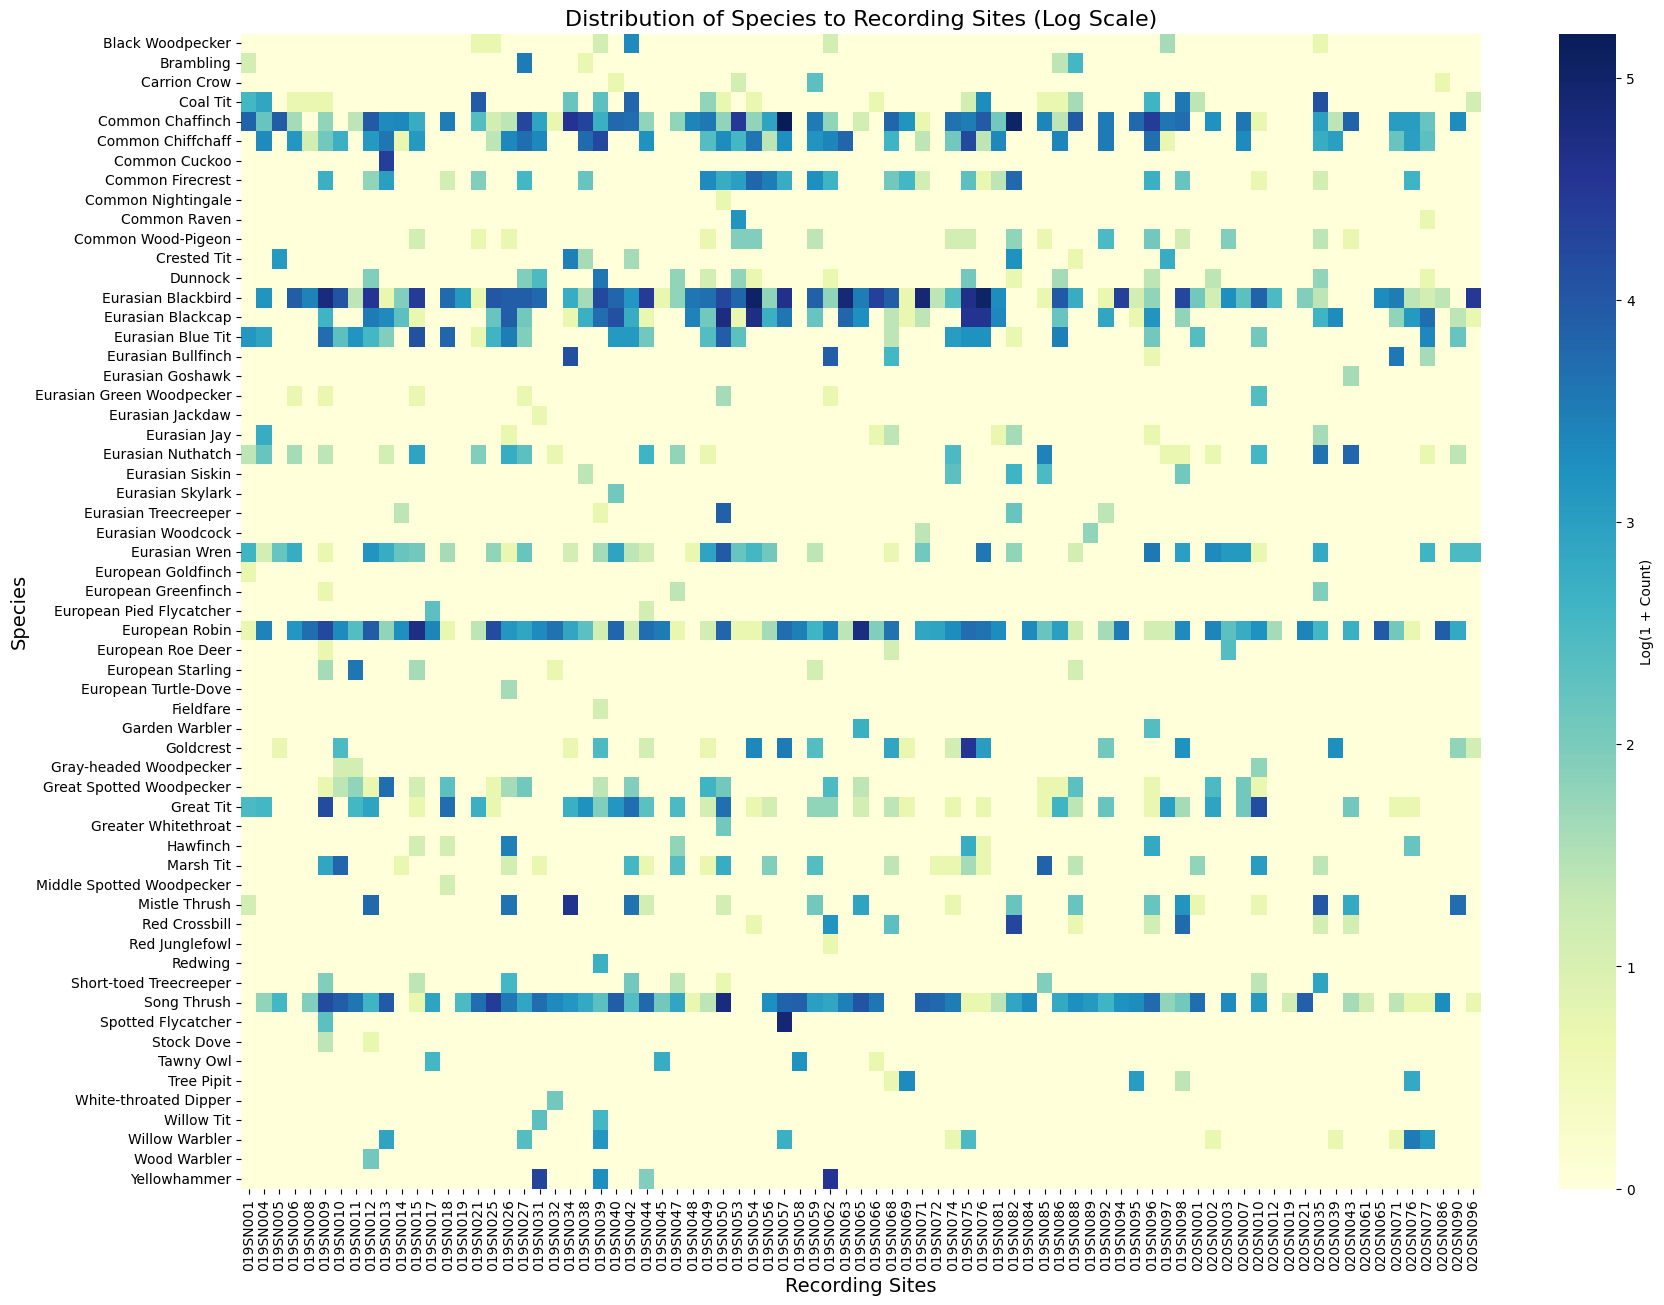

In [13]:
log_data = np.log1p(SPECIES_PER_RECORDING_SITES)

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(log_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Log(1 + Count)'})

plt.xlabel('Recording Sites', fontsize=14)
plt.ylabel('Species', fontsize=14)
plt.title('Distribution of Species to Recording Sites (Log Scale)', fontsize=16)

plt.yticks(fontsize=10)

plt.show()

## Total length of recordings

In [14]:
import soundfile as sf

total_length = 0

# Loop through the files in the AUDIOS directory
for file_name in os.listdir(AUDIOS):
    if file_name.endswith('.flac'):
        file_path = os.path.join(AUDIOS, file_name)
        with sf.SoundFile(file_path) as audio_file:
            total_length += len(audio_file) / audio_file.samplerate

print(f"Total length of all audio files: {total_length / 3600:.2f} hours")

# Check how this compares to annotated duration
df['duration'] = df['end_time'] - df['start_time']
total_duration_from_df = df['duration'].sum()

print(f"Total length of all audio files from dataframe (overlap possible): {total_duration_from_df / 3600:.2f} hours")

Total length of all audio files: 7.65 hours
Total length of all audio files from dataframe (overlap possible): 9.37 hours


## Date of recordings

In [15]:
df['year'] = pd.to_datetime(df['time_UTC']).dt.year
samples_per_year = df['year'].value_counts().sort_index()

print(samples_per_year)

year
2019    13111
2020     1943
Name: count, dtype: int64


# [WIP] Creating DT split for XCL

In [ ]:
from datasets import (
    load_dataset
)

dataset = load_dataset(path="DBD-research-group/BirdSet",name="XCL", cache_dir="../../data_birdset/XCL", num_proc=6)

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [1]:
print(type(dataset))

NameError: name 'dataset' is not defined